In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'next',
    'previous'
]

data = np.concatenate([
    np.load('dataset/seq_next_1632842323.npy'),
    np.load('dataset/seq_previous_1632842323.npy')
], axis=0)

data.shape

(1489, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1489, 30, 99)
(1489,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1489, 2)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1340, 30, 99) (1340, 2)
(149, 30, 99) (149, 2)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 44,130
Trainable params: 44,130
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping





history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    callbacks=[
        ModelCheckpoint('models/model_4rd.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
#         EarlyStopping( monitor='val_acc', min_delta=0, patience=50, verbose=1, mode='auto', baseline=None, restore_best_weights=False )
    ]
)

Epoch 1/500
42/42 [==============================] - 2s 16ms/step - loss: 5.1510 - acc: 0.6836 - val_loss: 0.7042 - val_acc: 0.7315

Epoch 00001: val_acc improved from -inf to 0.73154, saving model to models\model_4rd.h5
Epoch 2/500
42/42 [==============================] - 0s 11ms/step - loss: 1.3264 - acc: 0.8642 - val_loss: 0.2548 - val_acc: 0.9463

Epoch 00002: val_acc improved from 0.73154 to 0.94631, saving model to models\model_4rd.h5
Epoch 3/500
42/42 [==============================] - 0s 11ms/step - loss: 0.1751 - acc: 0.9507 - val_loss: 0.0106 - val_acc: 0.9933

Epoch 00003: val_acc improved from 0.94631 to 0.99329, saving model to models\model_4rd.h5
Epoch 4/500
42/42 [==============================] - 0s 11ms/step - loss: 0.0650 - acc: 0.9948 - val_loss: 5.3012e-04 - val_acc: 1.0000

Epoch 00004: val_acc improved from 0.99329 to 1.00000, saving model to models\model_4rd.h5
Epoch 5/500
42/42 [==============================] - 0s 11ms/step - loss: 0.0241 - acc: 0.9933 - val_lo

42/42 [==============================] - 0s 11ms/step - loss: 4.0457e-05 - acc: 1.0000 - val_loss: 2.3686e-05 - val_acc: 1.0000

Epoch 00043: val_acc did not improve from 1.00000
Epoch 44/500
42/42 [==============================] - 0s 11ms/step - loss: 3.8705e-05 - acc: 1.0000 - val_loss: 2.1796e-05 - val_acc: 1.0000

Epoch 00044: val_acc did not improve from 1.00000
Epoch 45/500
42/42 [==============================] - 0s 11ms/step - loss: 3.7200e-05 - acc: 1.0000 - val_loss: 2.0816e-05 - val_acc: 1.0000

Epoch 00045: val_acc did not improve from 1.00000
Epoch 46/500
42/42 [==============================] - 0s 11ms/step - loss: 3.5965e-05 - acc: 1.0000 - val_loss: 2.0327e-05 - val_acc: 1.0000

Epoch 00046: val_acc did not improve from 1.00000
Epoch 47/500
42/42 [==============================] - 0s 11ms/step - loss: 3.4721e-05 - acc: 1.0000 - val_loss: 1.9806e-05 - val_acc: 1.0000

Epoch 00047: val_acc did not improve from 1.00000
Epoch 48/500
42/42 [==============================] -

42/42 [==============================] - 0s 11ms/step - loss: 1.6191e-05 - acc: 1.0000 - val_loss: 1.0685e-05 - val_acc: 1.0000

Epoch 00085: val_acc did not improve from 1.00000
Epoch 86/500
42/42 [==============================] - 0s 11ms/step - loss: 1.5940e-05 - acc: 1.0000 - val_loss: 1.0505e-05 - val_acc: 1.0000

Epoch 00086: val_acc did not improve from 1.00000
Epoch 87/500
42/42 [==============================] - 0s 10ms/step - loss: 1.5624e-05 - acc: 1.0000 - val_loss: 1.0404e-05 - val_acc: 1.0000

Epoch 00087: val_acc did not improve from 1.00000
Epoch 88/500
42/42 [==============================] - 0s 10ms/step - loss: 1.5359e-05 - acc: 1.0000 - val_loss: 1.0265e-05 - val_acc: 1.0000

Epoch 00088: val_acc did not improve from 1.00000
Epoch 89/500
42/42 [==============================] - 0s 10ms/step - loss: 1.5069e-05 - acc: 1.0000 - val_loss: 1.0142e-05 - val_acc: 1.0000

Epoch 00089: val_acc did not improve from 1.00000
Epoch 90/500
42/42 [==============================] -

42/42 [==============================] - 0s 9ms/step - loss: 8.9166e-06 - acc: 1.0000 - val_loss: 7.7474e-06 - val_acc: 1.0000

Epoch 00127: val_acc did not improve from 1.00000
Epoch 128/500
42/42 [==============================] - 0s 10ms/step - loss: 8.8166e-06 - acc: 1.0000 - val_loss: 7.7106e-06 - val_acc: 1.0000

Epoch 00128: val_acc did not improve from 1.00000
Epoch 129/500
42/42 [==============================] - 0s 10ms/step - loss: 8.7134e-06 - acc: 1.0000 - val_loss: 7.6738e-06 - val_acc: 1.0000

Epoch 00129: val_acc did not improve from 1.00000
Epoch 130/500
42/42 [==============================] - 0s 11ms/step - loss: 8.6146e-06 - acc: 1.0000 - val_loss: 7.6386e-06 - val_acc: 1.0000

Epoch 00130: val_acc did not improve from 1.00000
Epoch 131/500
42/42 [==============================] - 0s 11ms/step - loss: 8.5127e-06 - acc: 1.0000 - val_loss: 7.6074e-06 - val_acc: 1.0000

Epoch 00131: val_acc did not improve from 1.00000
Epoch 132/500
42/42 [=============================

42/42 [==============================] - 0s 10ms/step - loss: 5.6147e-06 - acc: 1.0000 - val_loss: 6.5380e-06 - val_acc: 1.0000

Epoch 00169: val_acc did not improve from 1.00000
Epoch 170/500
42/42 [==============================] - 0s 9ms/step - loss: 5.5668e-06 - acc: 1.0000 - val_loss: 6.5140e-06 - val_acc: 1.0000

Epoch 00170: val_acc did not improve from 1.00000
Epoch 171/500
42/42 [==============================] - 0s 9ms/step - loss: 5.5220e-06 - acc: 1.0000 - val_loss: 6.4980e-06 - val_acc: 1.0000

Epoch 00171: val_acc did not improve from 1.00000
Epoch 172/500
42/42 [==============================] - 0s 10ms/step - loss: 5.4737e-06 - acc: 1.0000 - val_loss: 6.4772e-06 - val_acc: 1.0000

Epoch 00172: val_acc did not improve from 1.00000
Epoch 173/500
42/42 [==============================] - 0s 10ms/step - loss: 5.4272e-06 - acc: 1.0000 - val_loss: 6.4588e-06 - val_acc: 1.0000

Epoch 00173: val_acc did not improve from 1.00000
Epoch 174/500
42/42 [==============================

42/42 [==============================] - 0s 10ms/step - loss: 3.7803e-06 - acc: 1.0000 - val_loss: 5.8310e-06 - val_acc: 1.0000

Epoch 00211: val_acc did not improve from 1.00000
Epoch 212/500
42/42 [==============================] - 0s 10ms/step - loss: 3.7550e-06 - acc: 1.0000 - val_loss: 5.8198e-06 - val_acc: 1.0000

Epoch 00212: val_acc did not improve from 1.00000
Epoch 213/500
42/42 [==============================] - 0s 10ms/step - loss: 3.7304e-06 - acc: 1.0000 - val_loss: 5.8110e-06 - val_acc: 1.0000

Epoch 00213: val_acc did not improve from 1.00000
Epoch 214/500
42/42 [==============================] - 0s 10ms/step - loss: 3.7059e-06 - acc: 1.0000 - val_loss: 5.8006e-06 - val_acc: 1.0000

Epoch 00214: val_acc did not improve from 1.00000
Epoch 215/500
42/42 [==============================] - 0s 10ms/step - loss: 3.6815e-06 - acc: 1.0000 - val_loss: 5.7886e-06 - val_acc: 1.0000

Epoch 00215: val_acc did not improve from 1.00000
Epoch 216/500
42/42 [============================


Epoch 00253: val_acc did not improve from 1.00000
Epoch 254/500
42/42 [==============================] - 0s 10ms/step - loss: 2.6266e-06 - acc: 1.0000 - val_loss: 5.1080e-06 - val_acc: 1.0000

Epoch 00254: val_acc did not improve from 1.00000

Epoch 00254: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 255/500
42/42 [==============================] - 0s 11ms/step - loss: 2.5998e-06 - acc: 1.0000 - val_loss: 5.1016e-06 - val_acc: 1.0000

Epoch 00255: val_acc did not improve from 1.00000
Epoch 256/500
42/42 [==============================] - 0s 10ms/step - loss: 2.5873e-06 - acc: 1.0000 - val_loss: 5.0896e-06 - val_acc: 1.0000

Epoch 00256: val_acc did not improve from 1.00000
Epoch 257/500
42/42 [==============================] - 0s 10ms/step - loss: 2.5735e-06 - acc: 1.0000 - val_loss: 5.0784e-06 - val_acc: 1.0000

Epoch 00257: val_acc did not improve from 1.00000
Epoch 258/500
42/42 [==============================] - 0s 10ms/step - loss: 2.5579e-06 - acc: 1.

42/42 [==============================] - 0s 11ms/step - loss: 1.9308e-06 - acc: 1.0000 - val_loss: 4.5913e-06 - val_acc: 1.0000

Epoch 00296: val_acc did not improve from 1.00000
Epoch 297/500
42/42 [==============================] - 0s 11ms/step - loss: 1.9130e-06 - acc: 1.0000 - val_loss: 4.5737e-06 - val_acc: 1.0000

Epoch 00297: val_acc did not improve from 1.00000
Epoch 298/500
42/42 [==============================] - 0s 12ms/step - loss: 1.8952e-06 - acc: 1.0000 - val_loss: 4.5577e-06 - val_acc: 1.0000

Epoch 00298: val_acc did not improve from 1.00000
Epoch 299/500
42/42 [==============================] - 0s 10ms/step - loss: 1.8770e-06 - acc: 1.0000 - val_loss: 4.5417e-06 - val_acc: 1.0000

Epoch 00299: val_acc did not improve from 1.00000
Epoch 300/500
42/42 [==============================] - 0s 10ms/step - loss: 1.8580e-06 - acc: 1.0000 - val_loss: 4.5273e-06 - val_acc: 1.0000

Epoch 00300: val_acc did not improve from 1.00000
Epoch 301/500
42/42 [============================

42/42 [==============================] - 0s 9ms/step - loss: 1.4281e-06 - acc: 1.0000 - val_loss: 4.1730e-06 - val_acc: 1.0000

Epoch 00338: val_acc did not improve from 1.00000
Epoch 339/500
42/42 [==============================] - 0s 10ms/step - loss: 1.4163e-06 - acc: 1.0000 - val_loss: 4.1594e-06 - val_acc: 1.0000

Epoch 00339: val_acc did not improve from 1.00000
Epoch 340/500
42/42 [==============================] - 0s 9ms/step - loss: 1.4045e-06 - acc: 1.0000 - val_loss: 4.1514e-06 - val_acc: 1.0000

Epoch 00340: val_acc did not improve from 1.00000
Epoch 341/500
42/42 [==============================] - 0s 10ms/step - loss: 1.3930e-06 - acc: 1.0000 - val_loss: 4.1410e-06 - val_acc: 1.0000

Epoch 00341: val_acc did not improve from 1.00000
Epoch 342/500
42/42 [==============================] - 0s 9ms/step - loss: 1.3816e-06 - acc: 1.0000 - val_loss: 4.1282e-06 - val_acc: 1.0000

Epoch 00342: val_acc did not improve from 1.00000
Epoch 343/500
42/42 [==============================]

42/42 [==============================] - 0s 10ms/step - loss: 1.0677e-06 - acc: 1.0000 - val_loss: 3.8579e-06 - val_acc: 1.0000

Epoch 00380: val_acc did not improve from 1.00000
Epoch 381/500
42/42 [==============================] - 0s 10ms/step - loss: 1.0605e-06 - acc: 1.0000 - val_loss: 3.8483e-06 - val_acc: 1.0000

Epoch 00381: val_acc did not improve from 1.00000
Epoch 382/500
42/42 [==============================] - 0s 10ms/step - loss: 1.0532e-06 - acc: 1.0000 - val_loss: 3.8435e-06 - val_acc: 1.0000

Epoch 00382: val_acc did not improve from 1.00000
Epoch 383/500
42/42 [==============================] - 0s 10ms/step - loss: 1.0459e-06 - acc: 1.0000 - val_loss: 3.8371e-06 - val_acc: 1.0000

Epoch 00383: val_acc did not improve from 1.00000
Epoch 384/500
42/42 [==============================] - 0s 11ms/step - loss: 1.0387e-06 - acc: 1.0000 - val_loss: 3.8227e-06 - val_acc: 1.0000

Epoch 00384: val_acc did not improve from 1.00000
Epoch 385/500
42/42 [============================

42/42 [==============================] - 0s 11ms/step - loss: 8.0427e-07 - acc: 1.0000 - val_loss: 3.5883e-06 - val_acc: 1.0000

Epoch 00422: val_acc did not improve from 1.00000
Epoch 423/500
42/42 [==============================] - 0s 11ms/step - loss: 7.9973e-07 - acc: 1.0000 - val_loss: 3.5812e-06 - val_acc: 1.0000

Epoch 00423: val_acc did not improve from 1.00000
Epoch 424/500
42/42 [==============================] - 0s 11ms/step - loss: 7.9502e-07 - acc: 1.0000 - val_loss: 3.5780e-06 - val_acc: 1.0000

Epoch 00424: val_acc did not improve from 1.00000
Epoch 425/500
42/42 [==============================] - 0s 10ms/step - loss: 7.9013e-07 - acc: 1.0000 - val_loss: 3.5668e-06 - val_acc: 1.0000

Epoch 00425: val_acc did not improve from 1.00000
Epoch 426/500
42/42 [==============================] - 0s 11ms/step - loss: 7.8559e-07 - acc: 1.0000 - val_loss: 3.5636e-06 - val_acc: 1.0000

Epoch 00426: val_acc did not improve from 1.00000
Epoch 427/500
42/42 [============================

42/42 [==============================] - 0s 11ms/step - loss: 6.1177e-07 - acc: 1.0000 - val_loss: 3.3044e-06 - val_acc: 1.0000

Epoch 00464: val_acc did not improve from 1.00000
Epoch 465/500
42/42 [==============================] - 0s 10ms/step - loss: 6.0866e-07 - acc: 1.0000 - val_loss: 3.3020e-06 - val_acc: 1.0000

Epoch 00465: val_acc did not improve from 1.00000
Epoch 466/500
42/42 [==============================] - 0s 10ms/step - loss: 6.0617e-07 - acc: 1.0000 - val_loss: 3.2956e-06 - val_acc: 1.0000

Epoch 00466: val_acc did not improve from 1.00000
Epoch 467/500
42/42 [==============================] - 0s 10ms/step - loss: 6.0261e-07 - acc: 1.0000 - val_loss: 3.2932e-06 - val_acc: 1.0000

Epoch 00467: val_acc did not improve from 1.00000
Epoch 468/500
42/42 [==============================] - 0s 10ms/step - loss: 5.9976e-07 - acc: 1.0000 - val_loss: 3.2916e-06 - val_acc: 1.0000

Epoch 00468: val_acc did not improve from 1.00000
Epoch 469/500
42/42 [============================

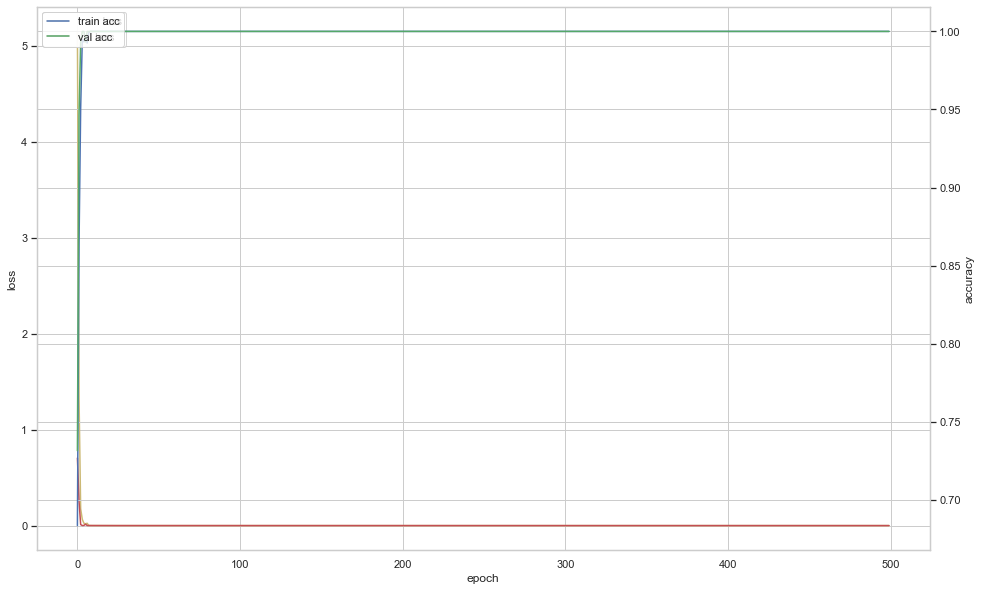

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()
fig.patch.set_facecolor('xkcd:white')

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model_4rd.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[81,  0],
        [ 0, 68]],

       [[68,  0],
        [ 0, 81]]], dtype=int64)